We want to assess the relationship between parameters such as constraint size and the necessary degree of crosslinking for successful network formation. We systematically read log files to determine the final crosslink count for diverse configurations. The resulting analysis provides visual confirmation of the distribution and scaling trends of the 90th percentile of required crosslinks needed to achieve full connectivity across different chain lengths and chain numbers.

In [154]:
import sys

sys.path.append("../")

In [155]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from config import Config

In [156]:
root_path = Path("../../data/tests").resolve()
all_log_paths = list(root_path.glob("*.log"))

In [157]:
dfs = []
for log_path in all_log_paths:
    gel_dir = log_path.parent / Path(log_path.stem)
    config = Config.from_file(gel_dir / "config.json")

    # find all occurences of the string "#Crosslinks so far X/Y" from the file
    with open(log_path, "r") as f:
        lines = [line for line in f.readlines() if "#Crosslinks so far" in line]
        if len(lines) == 0:
            continue
        line = lines[-1]
        # crop line to only include "#Crosslinks so far X/Y"
        # print(line)
        # if config.n_chains == 40 and config.chain_length == 8:
        #     print(line)
        line = line.split("#Crosslinks so far")[1].split()[0].strip()
        # extract X and Y which are ints
        n_crosslinks_done, _ = map(int, line.split()[-1].split("/"))

    
    dfs.append(
        {
            "n_chains": config.n_chains,
            "chain_length": config.chain_length,
            "path_name": log_path.name,
            "n_crosslinks_done": n_crosslinks_done,
        }
    )

In [158]:
df_path = Path("../../cl_df_with_wca.csv")
# df.to_csv(df_path)

In [159]:
old_method_df = pd.read_csv("../../cl_df.csv", index_col=0)
old_method_df = old_method_df[(old_method_df["n_chains"]==20)*(old_method_df["chain_length"]==8)]
display(old_method_df)
display(old_method_df["n_crosslinks_done"].mean())
display(old_method_df["n_crosslinks_done"].quantile(.9))

,n_chains,chain_length,path_name,n_crosslinks_done
226,20,8,new_crosslinking_Atiny10_9.log,119
227,20,8,new_crosslinking_Atiny10_8.log,117
253,20,8,new_crosslinking_Atiny10_13.log,152
261,20,8,new_crosslinking_Atiny10_12.log,46
264,20,8,new_crosslinking_Atiny10_10.log,133
...,...,...,...,...
550,20,8,new_crosslinking_tiny10_7.log,71
555,20,8,new_crosslinking_tiny10_6.log,108
557,20,8,new_crosslinking_tiny10_2.log,69
563,20,8,new_crosslinking_tiny10_3.log,130


108.640625

151.10000000000002

228.0

228.0

,n_chains,chain_length,path_name,n_crosslinks_done
0,20,80,new_crosslinking_wca_9.log,228
1,20,80,new_crosslinking_wca_8.log,228
2,20,80,new_crosslinking_wca_27.log,228
3,20,80,new_crosslinking_wca_32.log,228
4,20,80,new_crosslinking_wca_26.log,228
5,20,80,new_crosslinking_wca_30.log,228
6,20,80,new_crosslinking_wca_24.log,228
7,20,80,new_crosslinking_wca_18.log,228
8,20,80,new_crosslinking_wca_19.log,228
9,20,80,new_crosslinking_wca_25.log,228


<Axes: >

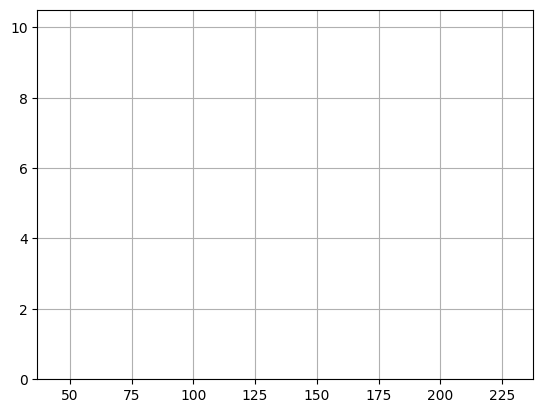

In [160]:
df = pd.DataFrame(dfs)
if df_path.exists():
    df = pd.concat([df, pd.read_csv(df_path, index_col=0)], ignore_index=True)
display(df["n_crosslinks_done"].mean())
display(df["n_crosslinks_done"].quantile(.9))
display(df)
df["n_crosslinks_done"].hist(density=True,)
old_method_df["n_crosslinks_done"].hist(density=True,alpha=0.5)

# Show a single config

,n_chains,chain_length,path_name,n_crosslinks_done
1,10,64,new_crosslinking_Atiny03_18.log,91
2,10,64,new_crosslinking_Atiny03_24.log,113
3,10,64,new_crosslinking_Atiny03_30.log,91
7,10,64,new_crosslinking_Atiny03_5.log,91
8,10,64,new_crosslinking_Atiny03_4.log,91
...,...,...,...,...
424,10,64,new_crosslinking_tiny03_5.log,93
431,10,64,new_crosslinking_tiny03_1.log,188
440,10,64,new_crosslinking_tiny03_2.log,91
445,10,64,new_crosslinking_tiny03_3.log,91


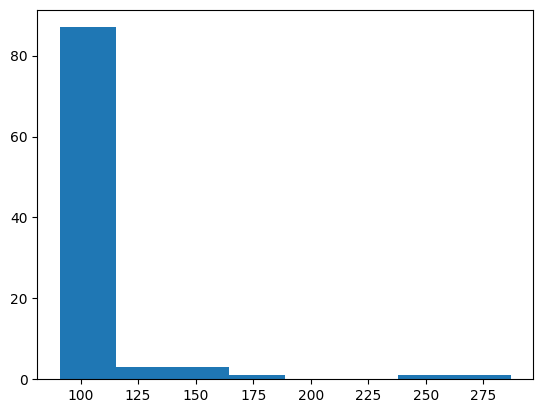

In [8]:
for n_chains, group in df.groupby(["n_chains", "chain_length"]):
    if not (n_chains[0] == 10 and n_chains[1] == 64):
        continue

    # print(n_chains)
    display(group)
    plt.hist(group["n_crosslinks_done"], bins="auto")
    plt.show()

# Show all configs

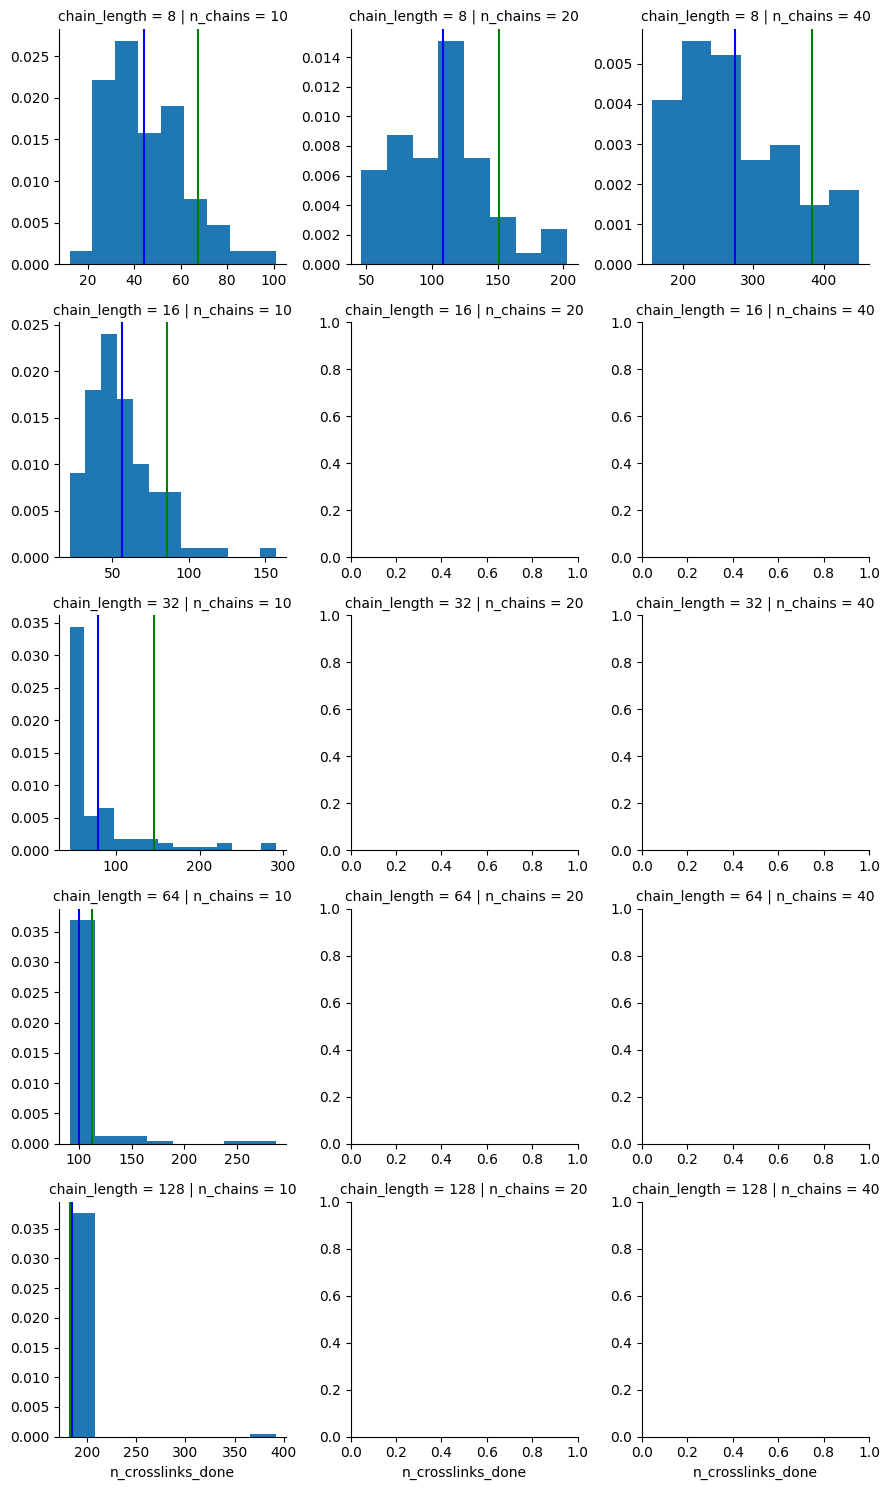

In [9]:
def plot_histogram(*args, **kwargs):
    plt.hist(kwargs["data"][kwargs["x"]], bins="auto", density=True)

    # plot 90th percentile
    p90 = kwargs["data"][kwargs["x"]].quantile(.9)
    plt.axvline(x=p90, color="green")
    # plot mean
    mean = kwargs["data"][kwargs["x"]].mean()
    plt.axvline(x=mean, color="blue")

g = sns.FacetGrid(df, col="n_chains", row="chain_length", sharex=False, sharey=False)
g.map_dataframe(plot_histogram, x="n_crosslinks_done")
plt.show()

# How many crosslinks are enough in 90% of cases to have full connectivity?

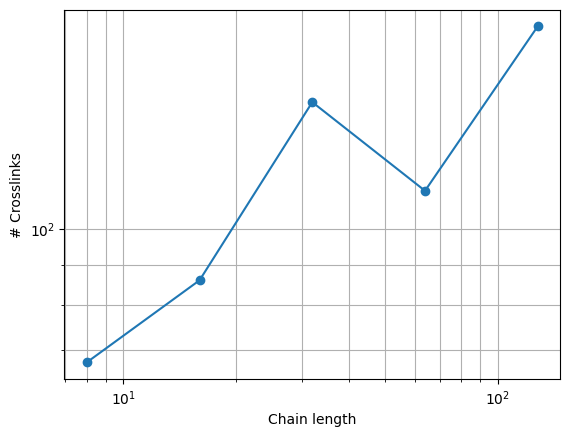

In [10]:
fig, ax = plt.subplots()
ax.set_title("")
ax.set_xlabel("Chain length")
ax.set_ylabel("# Crosslinks")
ax.loglog(df[df["n_chains"]==10].groupby("chain_length")["n_crosslinks_done"].quantile(.9), "-o")
# add grid in background
# ax.grid(True)
ax.grid(True, which="both", ls="-")
plt.show()

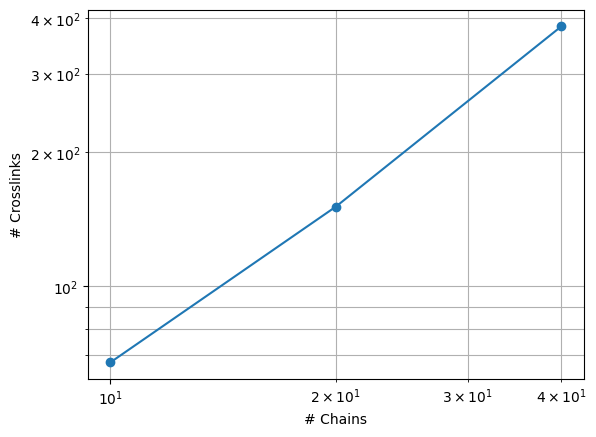

In [11]:
fig, ax = plt.subplots()
ax.set_title("")
ax.set_xlabel("# Chains")
ax.set_ylabel("# Crosslinks")
ax.loglog(df[df["chain_length"]==8].groupby("n_chains")["n_crosslinks_done"].quantile(.9), "-o")
# add grid in background
# ax.grid(True)
ax.grid(True, which="both", ls="-")
plt.show()

# Extrapolation

In [12]:
df[df["chain_length"]==8].groupby("n_chains")["n_crosslinks_done"].quantile(.9)

n_chains
10     67.5
20    151.1
40    384.1
Name: n_crosslinks_done, dtype: float64

In [13]:
print(151.1 / 67.5)
print(384.1 / 151.1)

2.2385185185185184
2.5420251489080083


In [14]:
df[df["n_chains"]==10].groupby("chain_length")["n_crosslinks_done"].quantile(.9)

chain_length
8       67.5
16      86.0
32     145.5
64     112.0
128    182.0
Name: n_crosslinks_done, dtype: float64

In [16]:
print(86.0 / 67.5)
print(145.5 / 86.0)
print(182.0 / 145.5)

1.2740740740740741
1.691860465116279
1.2508591065292096


In [18]:
2**(np.log2(400/40)) * 384.1  # num crosslinks if n_chains is 400 and chain length is 8

3840.9999999999995

In [21]:
2**(np.log2(80/8)) * 67.5  # num crosslinks if n_chains is 10 and chain length is 80

674.9999999999999

In [22]:
2**(np.log2(400/40)) * 2**(np.log2(80/8)) * 67.5  # num crosslinks if n_chains is 400 and chain length is 80

# experiment has required about 30_000 though ...

6749.999999999998